In [1]:
from PythonForBM432 import *

In [2]:
file = r"./shuffle4/"

In [3]:
data = load_prepared_data() # Run once during the whole ananylsis
filels= data.index.values.tolist()
len(filels)

19

In [4]:
num_bp = eval(input('Enter the index number of BP to analyzed:'))

Enter the index number of BP to analyzed:0


In [5]:
filels

['FAD01_OF',
 'FAD02_OF',
 'FAD03_OF',
 'FAD04_OF',
 'FAD09_remapped',
 'FAD10_remapped',
 'FAD11_remapped',
 'FAD12_remapped',
 'FAD13_remapped',
 'FAD15_remapped',
 'FAD16_remapped',
 'FAD17_OF',
 'FAD18_OF',
 'FAD19_OF',
 'FAD20_OF',
 'FAD06_OF',
 'FAD05_OF',
 'FAD08_OF',
 'FAD07_OF']

In [6]:
# videoname = 'FAD01_OF'

In [7]:

for videoname in filels:
    csv_ls = read_filtered_csv(file, videoname = videoname)

    '''0: image calibration '''
    TopL,BottomR, dur= get_video_info(data=data, video=videoname)

    #image_calibration
    BottomR = eval(BottomR)
    TopL = eval(TopL)
    dur = float(dur)
    # Convert pixel distance to actual distance in cm (CalX/Y : ratio of pixel / cm)
    CalX = (BottomR[0]-TopL[0])/BoxL
    CalY = (BottomR[1]-TopL[1])/BoxL

    videoinfo = pd.read_csv('./ok.csv')
    videoinfo = videoinfo.set_index('video')

    print('The video being processed:',videoname)
    
    filtered_path = read_filtered_csv(dir_name=file,videoname=videoname)

    cData,fLs, Time = process(filtered_path,dur,start=num_bp) # start=5 : the fifth body part stored in the config.yaml

    cData_copy=cData.copy() # Hard copy of data before cailbration
    for j in range(0,nBPs): #Pixel2centermeter Converter: BP coordinate minus that of top left corner
        cData_copy[j,:,0] -= TopL[0]
        cData_copy[j,:, 2] -= TopL[1]
        cData_copy[j,:, 0] /= CalX
        cData_copy[j,:, 2] /= CalY
        cData_copy[j,:,1:4:2] =cData_copy[j,:,0:3:2]
    # Save the raw data of accreleration for the given BP index
    df_acce = cal_speed_acce(videoname=videoname, data=data,cData_co = cData_copy,dur=dur) 
    df_ac_total = pd.DataFrame(index=df_acce.index)

    output = edge_prefer(fLs, cData_copy,data=data,videoname=videoname,EdgeWidth=10) # default = 5

    print('Output ==', output.head())

output.to_csv(f'./shuffle4_distance_{num_bp}_edge10cm.csv')

The video being processed: FAD01_OF
Value of i : 0, Picked body part : 0
fps: 23
Output ==                        tl         br   length  width  height  \
video                                                          
FAD01_OF        [103, 86]  [398,407]  1357.08  418.0   444.0   
FAD02_OF          [24,69]  [324,401]  1357.08  438.0   440.0   
FAD03_OF          [22,76]  [319,405]  1194.64  416.0   432.0   
FAD04_OF          [92,77]  [387,396]  1194.64  404.0   422.0   
FAD09_remapped   [102,98]  [395,384]  1192.20  410.0   404.0   

                Travel distance (cm)  Average speed (cm/min)  per_center (%)  
video                                                                         
FAD01_OF                15213.300752                6.459154        0.099958  
FAD02_OF                    0.000000                0.000000        0.000000  
FAD03_OF                    0.000000                0.000000        0.000000  
FAD04_OF                    0.000000                0.000000     

Value of i : 0, Picked body part : 0
fps: 25
Output ==                        tl         br   length  width  height  \
video                                                          
FAD01_OF        [103, 86]  [398,407]  1357.08  418.0   444.0   
FAD02_OF          [24,69]  [324,401]  1357.08  438.0   440.0   
FAD03_OF          [22,76]  [319,405]  1194.64  416.0   432.0   
FAD04_OF          [92,77]  [387,396]  1194.64  404.0   422.0   
FAD09_remapped   [102,98]  [395,384]  1192.20  410.0   404.0   

                Travel distance (cm)  Average speed (cm/min)  per_center (%)  
video                                                                         
FAD01_OF                15213.300752                6.459154        0.099958  
FAD02_OF                 9976.415468                3.790923        0.165027  
FAD03_OF                13489.992008                5.801297        0.172002  
FAD04_OF                14486.540560                6.736584        0.155059  
FAD09_remapped        

Value of i : 0, Picked body part : 0
fps: 25
Output ==                        tl         br   length  width  height  \
video                                                          
FAD01_OF        [103, 86]  [398,407]  1357.08  418.0   444.0   
FAD02_OF          [24,69]  [324,401]  1357.08  438.0   440.0   
FAD03_OF          [22,76]  [319,405]  1194.64  416.0   432.0   
FAD04_OF          [92,77]  [387,396]  1194.64  404.0   422.0   
FAD09_remapped   [102,98]  [395,384]  1192.20  410.0   404.0   

                Travel distance (cm)  Average speed (cm/min)  per_center (%)  
video                                                                         
FAD01_OF                15213.300752                6.459154        0.099958  
FAD02_OF                 9976.415468                3.790923        0.165027  
FAD03_OF                13489.992008                5.801297        0.172002  
FAD04_OF                14486.540560                6.736584        0.155059  
FAD09_remapped        

### Dimensional reduction via PaCMAP

In [19]:
import  pacmap
import matplotlib.pyplot as plt

# Load in the mapper of motifs and communities of behaviors
mapper = pd.read_csv('./100motifs_mapper.csv',index_col=0)
mapper2d= mapper.squeeze(axis=1)

def maps(x):
    return mapper2d.loc[x]

In [20]:
motif_label = np.load('./100_km_label_FAD01_OF.npy') # .shape = (31183,)
motif_label_community = np.array(list(map(maps, motif_label)))

latent_vector = np.load('./latent_vector_FAD01_OF.npy') # Load the raw latent_vector from VAME model results

num_points = 30000 #  = cfg['num_points']

if num_points > latent_vector.shape[0]:
    num_points = latent_vector.shape[0]
print("Embedded %d data points." %num_points) #数据条数<= latent_vector[0]

Embedded 30000 data points.


In [21]:
n_neighbors = 10 + 15 * (np.log10(motif_label_community.shape[0]) - 4) # Recommended if # of samples >10000
n_neighbors  = round(n_neighbors,0)

In [22]:
reducer = pacmap.PaCMAP(n_components=2, n_neighbors=int(n_neighbors), MN_ratio=0.5, FP_ratio=2.0, lr=0.2) 

embed = reducer.fit_transform(latent_vector, init="pca") 

In [25]:
def umap_vis(embed, num_points):        
    fig = plt.figure(1)
    plt.scatter(embed[:num_points,0], embed[:num_points,1], s=2, alpha=.5)
    plt.gca().set_aspect('equal', 'datalim')
    plt.grid(False)
    
    

def umap_label_vis(embed, label, n_community, num_points):
    fig = plt.figure(1)
    plt.scatter(embed[:,0], embed[:,1], c=motif_label_community, cmap='coolwarm', s=2)
    plt.colorbar(boundaries=np.arange(n_community+1)-0.5).set_ticks(np.arange(n_community))
    plt.gca().set_aspect('equal', 'datalim')
    plt.grid(False)
    plt.savefig('./Visualization_DR.svg')



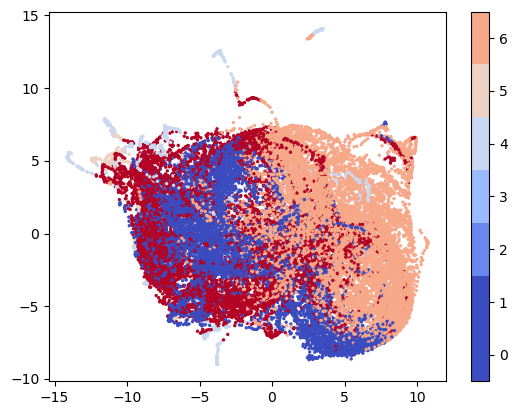

In [26]:
if motif_label_community.shape == motif_label.shape:
    umap_label_vis(embed, motif_label_community, 7, num_points)
else:
    print('Failed to plot, dimensional mismatch.')
